In [3]:
# prompt: open google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📄 First few rows of the dataset:
    latitude  longitude       ppe     osm_id   highway   quality  passengers  \
0  50.876331   4.275122  0.148500  305852128  motorway  0.000000         2.0   
1  50.878239   4.278250  0.065000  315968522  motorway  0.000000         2.0   
2  50.878362   4.278460  0.065000  315968522  motorway  0.000000         2.0   
3  50.878486   4.278669  0.065667  315968522  motorway  0.002193         2.0   
4  50.878609   4.278878  0.094000  315968522  motorway  0.044415         2.0   

            updated_at  
0  2019-11-24 14:53:48  
1  2019-11-24 14:54:00  
2  2019-11-24 14:54:00  
3  2019-11-24 14:54:01  
4  2019-11-24 14:54:02  

📊 Model Evaluation Results:
Mean Absolute Error (MAE): 0.041967
Root Mean Squared Error (RMSE): 0.238798
R² Score: 0.520647


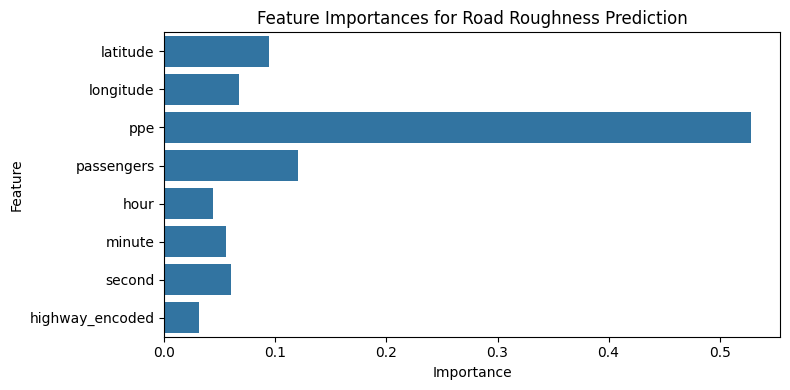

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Load data
path = "/content/drive/MyDrive/Road_Condition/open_data.csv"
df = pd.read_csv(path)

# 🔹 Step 2: Clean column names (just in case)
df.columns = df.columns.str.strip().str.replace('"', '')

# 🔹 Step 3: Display first few rows
print("📄 First few rows of the dataset:")
print(df.head())

# 🔹 Step 4: Convert 'updated_at' to datetime (handle fractional seconds)
df['updated_at'] = pd.to_datetime(df['updated_at'], format='mixed', errors='coerce')

# 🔹 Step 5: Drop rows with invalid or missing datetime
df = df.dropna(subset=['updated_at'])

# 🔹 Step 6: Feature engineering from datetime
df['hour'] = df['updated_at'].dt.hour
df['minute'] = df['updated_at'].dt.minute
df['second'] = df['updated_at'].dt.second

# 🔹 Step 7: Encode categorical variable 'highway'
label_enc = LabelEncoder()
df['highway_encoded'] = label_enc.fit_transform(df['highway'])

# 🔹 Step 8: Define features and target
features = ['latitude', 'longitude', 'ppe', 'passengers', 'hour', 'minute', 'second', 'highway_encoded']
target = 'quality'

# 🔹 Step 9: Drop any rows with missing values in selected columns
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# 🔹 Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 11: Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔹 Step 12: Prediction and Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")

# 🔹 Step 13: Feature Importance
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances for Road Roughness Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
